<a href="https://colab.research.google.com/github/arsalanliaquat/SEP788_Project/blob/main/SEP788_ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries

In [69]:
import numpy as np
import pandas as pd
import time
# pyplot plt
import matplotlib.pyplot as plt
# metrics
from sklearn import metrics
# ignore non-error warnings
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Test Train model selection, cross validation score
from sklearn.model_selection import train_test_split, cross_val_score
# mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
# precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Support Vector Machine SVM
from sklearn.svm import SVC
# Fishers Linear Discriminant FLD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LogisticRegression
from sklearn.linear_model import LogisticRegression

Load Dataset from file

In [71]:
dataset = pd.read_table('data_banknote_authentication.txt', delimiter=',', usecols=[0,1,2,3,4], names=['variance', 'skewness', 'curtosis', 'entropy', 'isAuthentic' ], header=None)
dataset.head()
# dataset.shape

,variance,skewness,curtosis,entropy,isAuthentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [72]:
# Check the dataset info
dataset.info()

# No. of samples in each class
dataset['isAuthentic'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variance     1372 non-null   float64
 1   skewness     1372 non-null   float64
 2   curtosis     1372 non-null   float64
 3   entropy      1372 non-null   float64
 4   isAuthentic  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


0    762
1    610
Name: isAuthentic, dtype: int64

In [73]:
# Check for null values
dataset.isnull().sum()

variance       0
skewness       0
curtosis       0
entropy        0
isAuthentic    0
dtype: int64

Plot data to visualize data distribution based on classes

Histograms

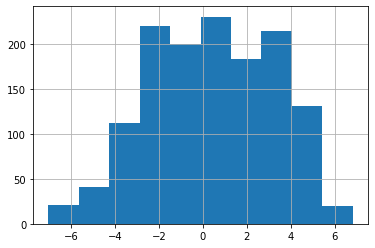

In [74]:
# Exploratory Data Analysis
dataset['variance'].hist()

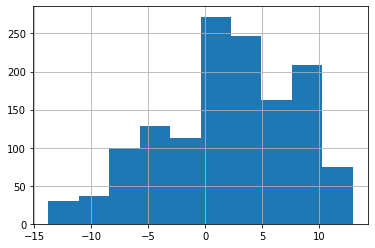

In [75]:
dataset['skewness'].hist()

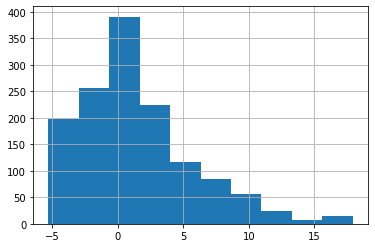

In [76]:
dataset['curtosis'].hist()

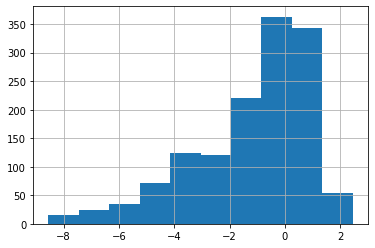

In [77]:
dataset['entropy'].hist()

Scatterplots

In [78]:
colors = ['red', 'blue']
isAuthentic = [1, 0]

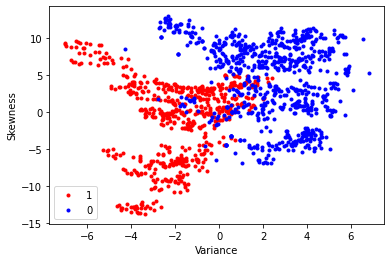

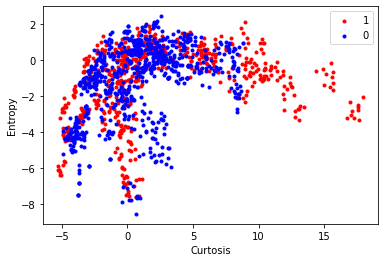

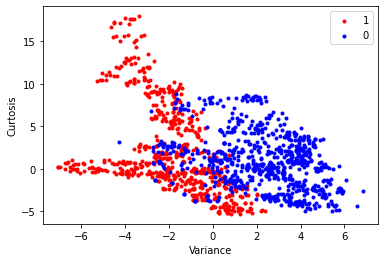

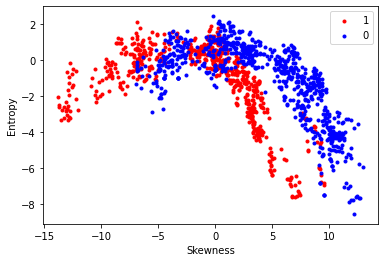

In [79]:
# for i in range(2):
for i in range(len(isAuthentic)):
    x = dataset[dataset['isAuthentic'] == isAuthentic[i]]
    plt.scatter(x['variance'], x['skewness'], c = colors[i], label = isAuthentic[i], marker='.')

plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.legend()
plt.show()

for i in range(len(isAuthentic)):
    x = dataset[dataset['isAuthentic'] == isAuthentic[i]]
    plt.scatter(x['curtosis'], x['entropy'], c = colors[i], label = isAuthentic[i], marker='.')
    
plt.xlabel("Curtosis")
plt.ylabel("Entropy")
plt.legend()
plt.show()

for i in range(len(isAuthentic)):
    x = dataset[dataset['isAuthentic'] == isAuthentic[i]]
    plt.scatter(x['variance'], x['curtosis'], c = colors[i], label = isAuthentic[i], marker='.')
    
plt.xlabel("Variance")
plt.ylabel("Curtosis")
plt.legend()
plt.show()

for i in range(len(isAuthentic)):
    x = dataset[dataset['isAuthentic'] == isAuthentic[i]]
    plt.scatter(x['skewness'], x['entropy'], c = colors[i], label = isAuthentic[i], marker='.')
    
plt.xlabel("Skewness")
plt.ylabel("Entropy")
plt.legend()
plt.show()

In [80]:
# Verify Target
dataset['isAuthentic'].unique()

array([0, 1])

In [81]:
# Define Feature
Features = ['variance', 'skewness', 'curtosis', 'entropy']
print('Full Features: ', Features)

# Define Target
Target = ['isAuthentic']
print('Target: ', Target)

Full Features:  ['variance', 'skewness', 'curtosis', 'entropy']
Target:  ['isAuthentic']


Split dataset to Training & Testing Sets

In [82]:
X_train, X_test, y_train, y_test = train_test_split(dataset[Features], dataset[Target], test_size = 0.10, random_state = 5)
print(X_train.shape)
print(X_test.shape)

(1234, 4)
(138, 4)


Data Preprocessing

In [83]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dataset = scaler.fit_transform(dataset)
# dataset

Training Data

In [84]:
mean_Train = np.mean(X_train, axis = 0);
std_Train = np.std(X_train, axis = 0);
X_train = (X_train - mean_Train) / std_Train

Testing Data

In [85]:
X_test = (X_test - mean_Train) / std_Train

K-Nearest Neighbors

============== K-Nearest Neighbors ==============
Training Time    : 0.003
Evaluation Time  : 0.0054
Accuracy         :  1.0
Recall           :  1.0
Precision        :  1.0
F1 Score         :  1.0
Cross Validation :  [0.99514563 1.         1.        ]

Confusion Matrix : 
[[67  0]
 [ 0 71]]
True Negative    :  67
False Negative   :  0
True Positive    :  71
False Positive   :  0

Test set R-square value : 1.00

 FLD ROC Curve:


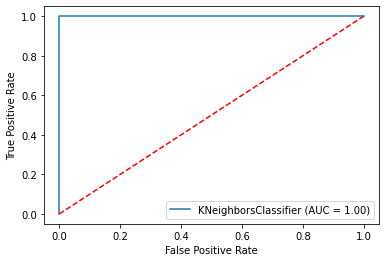

In [86]:
print("============== K-Nearest Neighbors ==============")

# Train a KNN classifier with 5 neighbors
# Model Fit
start_time = time.time()
k_neighbors = 9
KNN_model = KNeighborsClassifier(n_neighbors = k_neighbors).fit(X_train, y_train);
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))

# Model Predict
start_time = time.time()
y_predicted = KNN_model.predict(X_test)
elapsed_time = time.time() - start_time
print("Evaluation Time  : {:.2}".format(elapsed_time))

# Model Evaluation
Accuracy         = accuracy_score(y_test, y_predicted)
Recall           = recall_score(y_test, y_predicted, average = "weighted")
Precision        = precision_score(y_test, y_predicted, average = "weighted")
Score            = f1_score(y_test, y_predicted, average = 'micro')
Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Cross_Val        = cross_val_score(KNeighborsClassifier(n_neighbors = k_neighbors), X_train, y_train, cv = 3)

print("Accuracy         : ", Accuracy)
print("Recall           : ", Recall)
print("Precision        : ", Precision)
print("F1 Score         : ", Score)
print("Cross Validation : ", Cross_Val)
print("\nConfusion Matrix : ")
print(Confusion_Matrix)

print("True Negative    : ", Confusion_Matrix[0,0])
print("False Negative   : ", Confusion_Matrix[1,0])
print("True Positive    : ", Confusion_Matrix[1,1])
print("False Positive   : ", Confusion_Matrix[0,1])

print("\nTest set R-square value : {:.2f}".format(KNN_model.score(X_test, y_test)))

print("\n FLD ROC Curve:")
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label = 2)
metrics.plot_roc_curve(KNN_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Gaussian Naive Bayes

============== Gaussian Naive Bayes ==============
Training Time    : 0.002
Evaluation Time  : 0.0012
Accuracy         :  0.7753623188405797
Recall           :  0.7753623188405797
Precision        :  0.7772837066315326
F1 Score         :  0.7753623188405797
Cross Validation :  [0.84708738 0.83941606 0.84671533]

Confusion Matrix : 
[[54 13]
 [18 53]]
True Negative    :  54
False Negative   :  18
True Positive    :  53
False Positive   :  13

Test set R-square value : 0.78

 FLD ROC Curve:


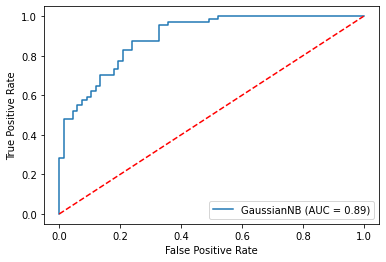

In [87]:
print("============== Gaussian Naive Bayes ==============")

gaussian_model = GaussianNB()

# Model Fit
start_time = time.time()
gaussian_model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))

# Model Predict
start_time = time.time()
y_predicted = gaussian_model.predict(X_test)
elapsed_time = time.time() - start_time
print("Evaluation Time  : {:.2}".format(elapsed_time))

# Model Evaluation
Accuracy         = accuracy_score(y_test, y_predicted)
Recall           = recall_score(y_test, y_predicted, average = "weighted")
Precision        = precision_score(y_test, y_predicted, average = "weighted")
Score            = f1_score(y_test, y_predicted, average = 'micro')
Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Cross_Val        = cross_val_score(GaussianNB(), X_train, y_train, cv = 3)

print("Accuracy         : ", Accuracy)
print("Recall           : ", Recall)
print("Precision        : ", Precision)
print("F1 Score         : ", Score)
print("Cross Validation : ", Cross_Val)
print("\nConfusion Matrix : ")
print(Confusion_Matrix)

print("True Negative    : ", Confusion_Matrix[0,0])
print("False Negative   : ", Confusion_Matrix[1,0])
print("True Positive    : ", Confusion_Matrix[1,1])
print("False Positive   : ", Confusion_Matrix[0,1])

print("\nTest set R-square value : {:.2f}".format(gaussian_model.score(X_test, y_test)))

print("\n FLD ROC Curve:")
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label = 2)
metrics.plot_roc_curve(gaussian_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Support Vector Machine

============== Support Vector Machine (SVM) ==============
Training Time    : 0.0089
Evaluation Time  : 0.0016
Accuracy         :  0.9782608695652174
Recall           :  0.9782608695652174
Precision        :  0.9791421856639247
F1 Score         :  0.9782608695652174
Cross Validation :  [0.98543689 0.99026764 0.98053528]

Confusion Matrix : 
[[64  3]
 [ 0 71]]
True Negative    :  64
False Negative   :  0
True Positive    :  71
False Positive   :  3

Test set R-square value : 0.98

 FLD ROC Curve:


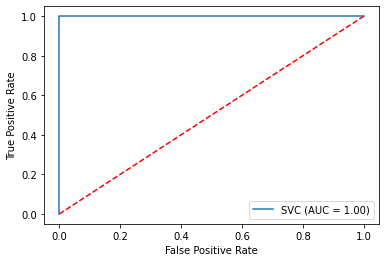

In [88]:
print("============== Support Vector Machine (SVM) ==============")

#  Create Model with configuration
SVM_model = SVC(kernel='linear')

# Model Fit
start_time = time.time()
SVM_model.fit(X = X_train, y = y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))

# Model Predict
start_time = time.time()
y_predicted = SVM_model.predict(X_test) 
elapsed_time = time.time() - start_time
print("Evaluation Time  : {:.2}".format(elapsed_time))

# Model Evaluation
Accuracy         = accuracy_score(y_test, y_predicted)
Recall           = recall_score(y_test, y_predicted, average = "weighted")
Precision        = precision_score(y_test, y_predicted, average = "weighted")
Score            = f1_score(y_test, y_predicted, average = 'micro')
Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Cross_Val        = cross_val_score(SVC(kernel='linear'), X_train, y_train, cv = 3)

print("Accuracy         : ", Accuracy)
print("Recall           : ", Recall)
print("Precision        : ", Precision)
print("F1 Score         : ", Score)
print("Cross Validation : ", Cross_Val)
print("\nConfusion Matrix : ")
print(Confusion_Matrix)

print("True Negative    : ", Confusion_Matrix[0,0])
print("False Negative   : ", Confusion_Matrix[1,0])
print("True Positive    : ", Confusion_Matrix[1,1])
print("False Positive   : ", Confusion_Matrix[0,1])

print("\nTest set R-square value : {:.2f}".format(SVM_model.score(X_test, y_test)))

print("\n FLD ROC Curve:")
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label = 2)
metrics.plot_roc_curve(SVM_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

========== FLD ==========
Training Time    : 0.0027
Evaluation Time  : 0.0011
Accuracy         :  0.9710144927536232
Recall           :  0.9710144927536232
Precision        :  0.97256038647343
F1 Score         :  0.9710144927536232
Cross Validation :  [0.98058252 0.97810219 0.97323601]

Confusion Matrix : 
[[63  4]
 [ 0 71]]
True Negative    :  63
False Negative   :  0
True Positive    :  71
False Positive   :  4

Test set R-square value : 0.97

 FLD ROC Curve:


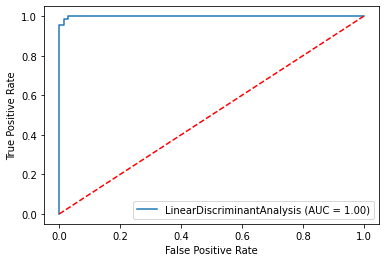

In [89]:
print("========== FLD ==========")

#  Create Model with configuration
lda_model = LinearDiscriminantAnalysis()

# Model Fit
start_time = time.time()
# lda.fit(X,xlabels)
lda_model.fit(X = X_train, y = y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))

# Model Predict
start_time = time.time()
y_predicted = lda_model.predict(X_test) 
elapsed_time = time.time() - start_time
print("Evaluation Time  : {:.2}".format(elapsed_time))

# Model Evaluation
Accuracy         = accuracy_score(y_test, y_predicted)
Recall           = recall_score(y_test, y_predicted, average = "weighted")
Precision        = precision_score(y_test, y_predicted, average = "weighted")
Score            = f1_score(y_test, y_predicted, average = 'micro')
Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Cross_Val        = cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, cv = 3)

print("Accuracy         : ", Accuracy)
print("Recall           : ", Recall)
print("Precision        : ", Precision)
print("F1 Score         : ", Score)
print("Cross Validation : ", Cross_Val)
print("\nConfusion Matrix : ")
print(Confusion_Matrix)

print("True Negative    : ", Confusion_Matrix[0,0])
print("False Negative   : ", Confusion_Matrix[1,0])
print("True Positive    : ", Confusion_Matrix[1,1])
print("False Positive   : ", Confusion_Matrix[0,1])

print("\nTest set R-square value : {:.2f}".format(lda_model.score(X_test, y_test)))

print("\n FLD ROC Curve:")
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label = 2)
metrics.plot_roc_curve(lda_model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

========== LogisticRegression ==========
Training Time    : 0.013
Evaluation Time  : 0.0018
Accuracy         :  0.9782608695652174
Recall           :  0.9782608695652174
Precision        :  0.9791421856639247
F1 Score         :  0.9782608695652174
Cross Validation :  [0.98543689 0.98540146 0.9756691 ]

Confusion Matrix : 
[[64  3]
 [ 0 71]]
True Negative    :  64
False Negative   :  0
True Positive    :  71
False Positive   :  3

Test set R-square value : 0.98

 FLD ROC Curve:


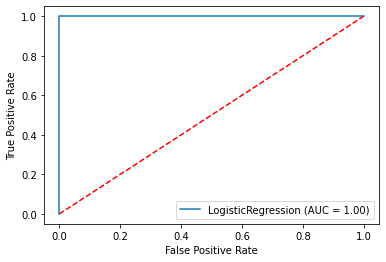

In [90]:
print("========== LogisticRegression ==========")

model_Logistic = LogisticRegression()
# Model Fit
start_time = time.time()
model_Logistic.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))

# Model Predict
start_time = time.time()
y_predicted = model_Logistic.predict(X_test)
elapsed_time = time.time() - start_time
print("Evaluation Time  : {:.2}".format(elapsed_time))

# Model Evaluation
Accuracy         = accuracy_score(y_test, y_predicted)
Recall           = recall_score(y_test, y_predicted, average = "weighted")
Precision        = precision_score(y_test, y_predicted, average = "weighted")
Score            = f1_score(y_test, y_predicted, average = 'micro')
Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Cross_Val        = cross_val_score(LogisticRegression(), X_train, y_train, cv = 3)

print("Accuracy         : ", Accuracy)
print("Recall           : ", Recall)
print("Precision        : ", Precision)
print("F1 Score         : ", Score)
print("Cross Validation : ", Cross_Val)
print("\nConfusion Matrix : ")
print(Confusion_Matrix)

print("True Negative    : ", Confusion_Matrix[0,0])
print("False Negative   : ", Confusion_Matrix[1,0])
print("True Positive    : ", Confusion_Matrix[1,1])
print("False Positive   : ", Confusion_Matrix[0,1])

print("\nTest set R-square value : {:.2f}".format(model_Logistic.score(X_test, y_test)))

print("\n FLD ROC Curve:")
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label = 2)
metrics.plot_roc_curve(model_Logistic, X_test, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()